<function matplotlib.pyplot.show>

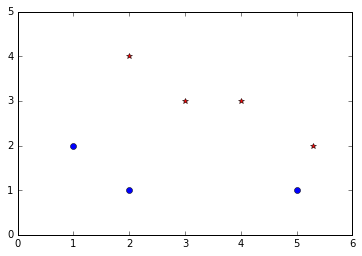

In [21]:
# this is implementation of CBBA algorithm 

# problem formulation 

import numpy as np
import matplotlib.pyplot as plt



Nu=3
u1=[1,2]; u2=[2,1]; u3=[5,1];
us=np.array([u1,u2,u3])
Nt=4
g1=[2,4]; g2=[3,3]; g3=[4,3]; g4=[5.3,2]
gs=np.array([g1,g2,g3,g4])



Y=Z=np.zeros((Nu,Nt))
B=P=[]
for i in range(Nu):
    B.append([])
    P.append([])
    
plt.plot(us[:,0],us[:,1],'bo')  
plt.plot(gs[:,0],gs[:,1],'r*')  

plt.axis([0 ,6, 0, 5])
plt.show


In [26]:

class CBBA:
    def __init__(self,us,gs,Lt):
        self.us=us; self.gs=gs
        
        self.Nu=len(us); self.Nt=len(gs) # number of unit & task 
        self.Z=np.zeros((Nu,Nt)) # winning bids & winner indexself.C=self.Y=
        self.C=np.zeros((Nu,Nt))
        self.Y=np.zeros((Nu,Nt))
        self.Z=np.ones((Nu,Nt))*(-1) # -1: none 
        self.P=[] # bundle & path
        self.B=[] # bundle & path 
        self.reward=10 # reward for taking a task 
        self.Lt=Lt # maxmum number of task 
        self.H=np.zeros((Nu,Nt)) # winning list 
        
        for i in range(Nu):
            self.B.append([])
            self.P.append([])
        
    def cost_along_p(self,inarg):
        if type(inarg) is int:
            cost=0 # total distance of travel along path 
            i=inarg
            if len(self.P[i]): 
                cost+=np.linalg.norm(self.us[i]-self.gs[self.P[i][0]],2)
            
            for step in range(len(self.B[i])-1):
                cost+=np.linalg.norm(self.gs[self.P[i][step]]-self.gs[self.P[i][step+1]],2)
            return cost 
        
        else:
            
            Pi=inarg[1]; i=inarg[0]
            cost=0 # total distance of travel along path 
            if len(Pi): 
                cost+=np.linalg.norm(self.us[i]-self.gs[Pi[0]])            
            for step in range(len(Pi)-1):
                cost+=np.linalg.norm(self.gs[Pi[step]]-self.gs[Pi[step+1]],2)
            return cost 

    
    def where_to_put(self,i,j):
        # where to put j th task to get the lowest cost 
        # caution : j should not be in the bundle
            
        min_cost=1e+5
        min_loc=0
        Pi=self.P[i][:]
        for loc in range(len(Pi)+1):
            Pi.insert(loc,j)
            if min_cost > self.cost_along_p((i,Pi)):
                min_loc=loc
                min_cost=self.cost_along_p((i,Pi))
            Pi=self.P[i][:]
            
        return (min_loc,min_cost)
                
        
    def marginal_gain(self,i,j):
         # compute c_ij()
         # check whether j is in the bundel bi 
        if j in self.B[i]:
            return 0
        else:
            #import ipdb; ipdb.set_trace()
            outarg=self.where_to_put(i,j)
            min_cost=outarg[1]
            return ((len(self.P[i])+1)*self.reward-(min_cost)
                    -(len(self.P[i])*self.reward-self.cost_along_p(i)))
        
    def phase1(self,i):
        # this 
        while len(self.B[i]) < self.Lt:
            # for all j
            for j in range(self.Nt):
                self.C[i,j]=self.marginal_gain(i,j)
                if self.C[i,j]>self.Y[i,j]:
                    self.H[i,j]=1
            
            if sum(self.H[i]):
                import ipdb; ipdb.set_trace()
                Ji=np.argmax(np.multiply(self.C[i],self.H[i]))
                self.B[i].append(Ji)
                self.P[i].insert(self.where_to_put(i,Ji)[0],Ji)
                self.Y[i,Ji]=self.C[i,Ji]
                self.Z[i,Ji]=i
                

In [31]:
cbba=CBBA(us,gs,3)
cbba.phase1(1)
cbba.B[1]
cbba.P[1]



> <ipython-input-26-ca413a87468e>(83)phase1()
     82                 import ipdb; ipdb.set_trace()
---> 83                 Ji=np.argmax(np.multiply(self.C[i],self.H[i]))
     84                 self.B[i].append(Ji)

ipdb> c
> <ipython-input-26-ca413a87468e>(82)phase1()
     81             if sum(self.H[i]):
---> 82                 import ipdb; ipdb.set_trace()
     83                 Ji=np.argmax(np.multiply(self.C[i],self.H[i]))

ipdb> self.C[i]
array([ 8.58578644,  0.        ,  9.        ,  7.49201276])
ipdb> n
> <ipython-input-26-ca413a87468e>(83)phase1()
     82                 import ipdb; ipdb.set_trace()
---> 83                 Ji=np.argmax(np.multiply(self.C[i],self.H[i]))
     84                 self.B[i].append(Ji)

ipdb> n
> <ipython-input-26-ca413a87468e>(84)phase1()
     83                 Ji=np.argmax(np.multiply(self.C[i],self.H[i]))
---> 84                 self.B[i].append(Ji)
     85                 self.P[i].insert(self.where_to_put(i,Ji)[0],Ji)

ipdb> n
> <ipython-i

ipdb> i
1
ipdb> j
*** The 'jump' command requires a line number.
ipdb> eval('j')
0
ipdb> n
> <ipython-input-26-ca413a87468e>(67)marginal_gain()
     66             #import ipdb; ipdb.set_trace()
---> 67             outarg=self.where_to_put(i,j)
     68             min_cost=outarg[1]

ipdb> s
--Call--
> <ipython-input-26-ca413a87468e>(43)where_to_put()
     42 
---> 43     def where_to_put(self,i,j):
     44         # where to put j th task to get the lowest cost

ipdb> n
> <ipython-input-26-ca413a87468e>(47)where_to_put()
     46 
---> 47         min_cost=1e+5
     48         min_loc=0

ipdb> i
1
ipdb> j
*** The 'jump' command requires a line number.
ipdb> eval('j')
0
ipdb> n
> <ipython-input-26-ca413a87468e>(48)where_to_put()
     47         min_cost=1e+5
---> 48         min_loc=0
     49         Pi=self.P[i][:]

ipdb> n
> <ipython-input-26-ca413a87468e>(49)where_to_put()
     48         min_loc=0
---> 49         Pi=self.P[i][:]
     50         for loc in range(len(Pi)+1):

ipdb> n
> 

BdbQuit: 

In [28]:
x=[1,2,3]
x.insert(0,5)
x

[5, 1, 2, 3]